## CA 1 Data Visualization and Communication

Lecturer(s):
Submission Date:
Student Name:
Student Email: 
Student Number:

### Introduction

You are required to use the dataset contained within the file “Fotune500.csv” and then perform the following analysis:
1)You are required to explain what you plan on doing with the data. E.g., Why did you choose the specific visualizations? Why did you choose specific observations for a visualization, how did you Engineer your Data? etc This must be detailed in the Mark-up of the Jupyter Notebook and include the rationale for your choice.
2)Generate a plot that details the 5 top Companies by Revenue for each Decade. E.g., Top 5 for 1950-1959, 1960-1969, etc. This must be a single plot either static or interactive.
3)Plot a graph depicting the distribution of the “Revenue” in the top 20 Companies in 1971.
4)Find out and visualize which Top 10 Company’s profit increased the most between 1990 and 1999 This Must be a Single plot either static or interactive.
5)Observe and plot the average revenue by decade This Must be a Single plot either static or interactive. 


### Task 

After importing the dataset, here is a step by step on how I plan to handle the data set:

First step is to decide which data frame and data visualization library should be used, we will be using pandas to understand the data, what are the types and to get an idea of what I will be working on, as is the most practical and the one I know the better. Seaborn as the data visualization library because I recently learnt it is an efficienty tool to work with, offers high quality interface in an easier way to work with, does not require too much lines of codes and it is build using the matplot so we can use the high level that seaborn has with low and basic customization level visualization that matplot has and is easy to integrate and work with pandas data frame. Second step will be using to pandas to make an analyse of the data, check if we have any null values or duplicates information, the types present, do some manipulation to learn more informations of all the data inside the file, such as which sector grew more along the years or decades and which sector was the strongest during the years, in my case I created a barplot, because it is easier to perceive the difference within the companies, to see which companies had the highest increase in Revenue within year, first we create the 'Revenue Development Growth' column and then "growth_companies = data[data['Year'] == last_year].nlargest(10, 'Revenue Development Growth')" this piece of code will return the 10 companies with the highest Revenue Growth. After, I will start manipulating the data to collect the information needed to answer the questions. 

In the second task, we have to create the decade column, then do a def function to return the 5 highest Revenues by decade and dropping the duplicate companies with the drop_duplicates functions and specifying the subset Company, and how many values we want to return, "def top5_decade(group): return group.drop_duplicates(subset='Company').nlargest(5, 'Revenue (in millions)')". For the graph, I choose the barplot to visualize the data because it is easier to read and see the difference with companies. With the visualization of your graph, we can conclude that the automobiles companies were always in the strong sector, and it could be used in cases where an investor is looking for somewhere different to invest.

In the third task, it is needed to filter the data, , where the 'Year' column is '1971', create a new dataframe with the data filtered, order the data from highest to lowest Revenue, that will help us understanding whose were the companies with the highest Revenue, and return those rows of data. After, to reproduce it, I choose the displot, distributive graph, to show how the Revenue was distributed within the top 20 companies because this plot is made to show how of single variable is distributed. With the visualization of the filtered data, we can conclude that during 1971's, automobiles companies held the highest share of the total Revenue within that year and that Tech companies started to making more money.

In the fourth task, 

In [1]:
# Import libraries needed

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data

data = pd.read_csv("C:/Users/henri/Downloads/fortune500.csv")
data

# Here we have our data loaded that contains info about the Fortune 500 from 1955 to 2005.
# It has data about the Year, the Rank, name of the company and Revenue and Profit in millions throughout those years.

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


In [3]:
# Cleaning Data

# Checking data for null values 
null_values = data.isnull()

# Giving a standard value for null values. 
data = data.fillna(0)

# Replace 'N.A.' values with 0
data= data.replace('N.A.', 0)

print(data)

       Year  Rank                Company  Revenue (in millions)  \
0      1955     1         General Motors                 9823.5   
1      1955     2            Exxon Mobil                 5661.4   
2      1955     3             U.S. Steel                 3250.4   
3      1955     4       General Electric                 2959.1   
4      1955     5                 Esmark                 2510.8   
...     ...   ...                    ...                    ...   
25495  2005   496        Wm. Wrigley Jr.                 3648.6   
25496  2005   497         Peabody Energy                 3631.6   
25497  2005   498  Wendy's International                 3630.4   
25498  2005   499     Kindred Healthcare                 3616.6   
25499  2005   500   Cincinnati Financial                 3614.0   

      Profit (in millions)  
0                      806  
1                    584.8  
2                    195.4  
3                    212.6  
4                     19.1  
...                  

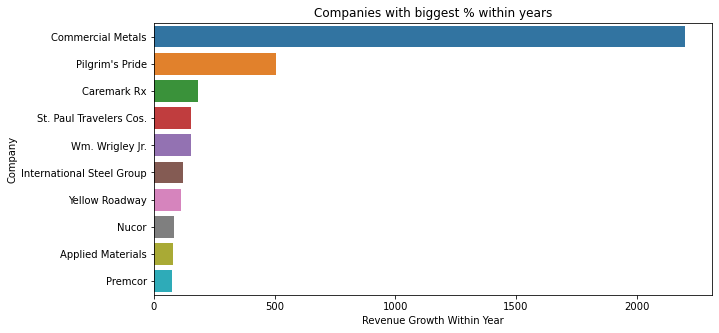

In [4]:
# Manipulating data to understand more about it

# We will find which companies had the biggest percentage of Revenue Growth within the given dataset.
# We will be using Seaborn bar graph to represent it. 

# Find the % of the Revenue value growth compared to the last year 
data['Revenue Development Growth'] = data.groupby('Company')['Revenue (in millions)'].pct_change()*100

# Create a dataframe by comparing the last year Revenue of given company to compare how much it grew
last_year = data['Year'].max()
growth_companies = data[data['Year'] == last_year].nlargest(10, 'Revenue Development Growth')

# Dropping 'Year' and 'Rank' columns since are not needed
growth_companies = growth_companies.drop('Year',axis = 1)
growth_companies = growth_companies.drop('Rank',axis = 1)

# Create the plot to represent the data collected 
# I have choose the barplot because it will represent better the first and second companies and see the difference between sectors.
plt.figure(figsize=(10,5))
sns.barplot(x='Revenue Development Growth',
           y= 'Company',
           data=growth_companies)
plt.xlabel('Revenue Growth Within Year')
plt.ylabel('Company')
plt.title('Companies with biggest % within years')
plt.show()


# Based on the outcome, we can conclude that Commercial Metals had the biggest percentage of revenue growth within the years on the data, which means that was the most profitable sector.


### Task 2

Create a plot that will show the 5 top Companies by Revenue for each decade. 



                    Company  Revenue (in millions) Profit (in millions)  \
0            General Motors                 9823.5                  806   
1               Exxon Mobil                 5661.4                584.8   
2                Ford Motor                 5594.0                  437   
3                U.S. Steel                 3250.4                195.4   
4          General Electric                 2959.1                212.6   
5            General Motors                11233.1                873.1   
6               Exxon Mobil                 7910.7                629.8   
7                Ford Motor                 5356.9                451.4   
8          General Electric                 4349.5                280.2   
9                U.S. Steel                 3643.0                254.6   
10           General Motors                24295.1               1710.7   
11              Exxon Mobil                14929.8               1047.6   
12               Ford Mot

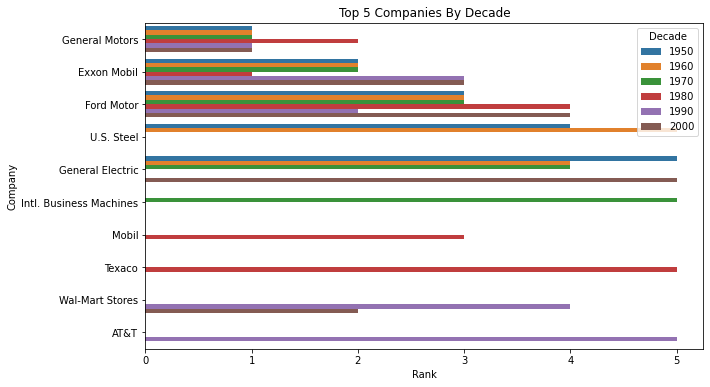

In [5]:
# Create Decade column in the dataframe
data['Decade'] = (data['Year'] // 10) * 10

# Def function to return the 5 highest Revenue and drop duplicates companies within Decades,later on we will apply it to decades
def top5_decade(group):
    return group.drop_duplicates(subset='Company').nlargest(5, 'Revenue (in millions)')

# Apply def function create to return the 5 highest Revenues by decade
top5_decade = data.groupby('Decade').apply(top5_decade)
top5_decade.drop(columns=['Revenue Development Growth','Rank', 'Year'], inplace=True)
top5_decade.reset_index(drop=True, inplace=True)

# Create Ranking Column
top5_decade['Ranking'] = top5_decade.groupby('Decade').cumcount() + 1
top5_decade.set_index('Ranking')
print(top5_decade)

# Create Bar Graph
plt.figure(figsize=(10,6))
sns.barplot(x='Ranking', y='Company', hue='Decade', 
            data=top5_decade)

## Need to make the graph easier to read
plt.title('Top 5 Companies By Decade')
plt.xlabel('Rank')
plt.ylabel('Company')
plt.show()

# Based on the new Dataframe we created, is possible to identify that General Motors, a car company, had total dominance over the market for 3 decades, being 1950, 1960 and 1990 and showed up significantly over the decade of 1980.
# This being observed, we can conclude that the Car sector has been in high demand for a long time and it is a consistant sector until nowadays.

### Task 3

Plot a graph depicting the distribution of the “Revenue” in the top 20 Companies in 1971.

https://stackoverflow.com/questions/43859416/finding-top-10-in-a-dataframe-in-pandas
https://pythonbasics.org/seaborn-distplot/

                            Company  Revenue (in millions)
0                    General Motors                18752.4
1                       Exxon Mobil                16554.2
2                        Ford Motor                14979.9
3                  General Electric                 8726.7
4           Intl. Business Machines                 7504.0
5                             Mobil                 7260.5
6                          Chrysler                 6999.7
7                    ITT Industries                 6364.5
8                            Texaco                 6349.8
9                 AT&T Technologies                 5856.2
10                         Gulf Oil                 5396.2
11                       U.S. Steel                 4814.4
12                              CBS                 4313.4
13                    ChevronTexaco                 4187.8
14                              LTV                 3771.7
15                            Amoco                 3732

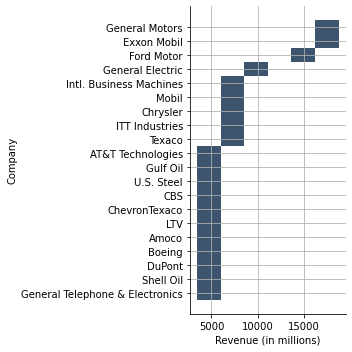

In [6]:
## Store all the companies in the year 1971, sort then by biggest revenue and display the first 20 rows

# Creating variable to store the data and sort values by the highest Revenue
data_1971 = data[data['Year']==1971].sort_values(by ='Revenue (in millions)', ascending=False).head(20)

# Drop columns not needed and reset index
data_1971.drop(columns=['Revenue Development Growth','Rank', 'Decade', 'Year', 'Profit (in millions)'], inplace=True)
data_1971.reset_index(drop=True, inplace=True)

print(data_1971)

# Create plot to show how was the distribution of the Revenue within 1971 
sns.displot(x='Revenue (in millions)',y = 'Company', data=data_1971)
plt.grid(True)
plt.show()

# Based on the outcome, it is possible to perceive that Automobile sector was the dominant sector in 1971, with General Motors, Exxon Mobil and Ford Motor having the Highest Revenues. 

## Task 4

Find out and visualize which Top 10 Company’s profit increased the most between 1990 and 1999. This Must be a Single plot either static or interactive. 

#https://www.analyticsvidhya.com/blog/2021/10/interactive-plots-in-python-with-plotly-a-complete-guide/



In [7]:
# Creating variable to store the data from 1990 to 1999
data_90 = data[(data['Year'] >= 1990) & (data['Year'] <= 1999)]

# Drop the columns we will not use, in this case we will need just 'Year' and 'Profit' 
data_90.drop(columns=['Revenue Development Growth','Rank', 'Decade', 'Revenue (in millions)'], inplace=True)


# Convert the Profit column into float type
data_90['Profit (in millions)'] = data_90['Profit (in millions)'].astype(float)

# Create new Column to calculate which companies had the highest grow %
data_90['Profit % Growth'] = data_90.groupby('Company')['Profit (in millions)'].pct_change() * 100

# Convert 'Profit % Growth' values, using lambda function, into formatted percentages
data_90['Profit % Growth'] = data_90['Profit % Growth'].apply(lambda x: f"{x:.2f}%")

# Sort the data to show the 20 first highest percentage growth in Profit
data_90 = data_90.sort_values(by='Profit % Growth', ascending=False)

# Drop nan values and 0 otherwise the column will return the nan as the highest growth
data_90 = data_90.replace('nan%', 0)
data_90 = data_90.replace('inf%', 0)
data_90 = data_90[data_90['Profit % Growth'] != 0]

data_90.head(10)

# Missing just the interact plot now

# Based on the outcome, we can see that Centex had the highest percentage growth in Profit in between 1990 and 1999. 
# With some research, it is a really diversified building company, going from furnitures to pest control services, I found that they were involved with over 20 buildings across the nation in the late 1990's. 
# The reason behind this was the quickly increase in demand for constructions objects, such as cements and concrete.
# http://www.fundinguniverse.com/company-histories/centex-corporation-history/

C:\Users\henri\AppData\Local\Temp\ipykernel_21244\1297396838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_90.drop(columns=['Revenue Development Growth','Rank', 'Decade', 'Revenue (in millions)'], inplace=True)
C:\Users\henri\AppData\Local\Temp\ipykernel_21244\1297396838.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_90['Profit (in millions)'] = data_90['Profit (in millions)'].astype(float)
C:\Users\henri\AppData\Local\Temp\ipykernel_21244\1297396838.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,Year,Company,Profit (in millions),Profit % Growth
21883,1998,Centex,106.6,99.63%
19721,1994,Dell,101.6,99.61%
19269,1993,Lafarge,-100.6,99.60%
22210,1999,Navistar International,299.0,99.33%
22231,1999,Marsh & McLennan,796.0,99.30%
19637,1994,Gannett,397.8,99.20%
20078,1995,ConocoPhillips,484.0,99.18%
20888,1996,Asarco,169.2,984.62%
18653,1992,VF,161.3,98.89%
20000,1995,General Motors,4900.6,98.74%
